# Exercise2_03

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv("circles.csv")
data.head()

,0,1
0,0.393992,-0.416376
1,0.528243,-0.828242
2,-0.740158,0.607730
3,-0.971016,0.316821
4,0.018693,-0.605288


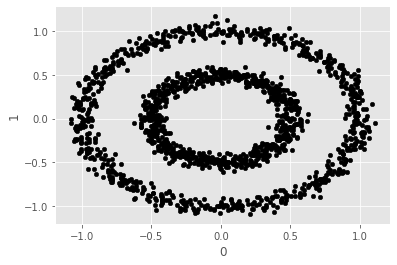

In [3]:
data.plot(
    kind='scatter',
    x='0',
    y='1',
    color='k',
)

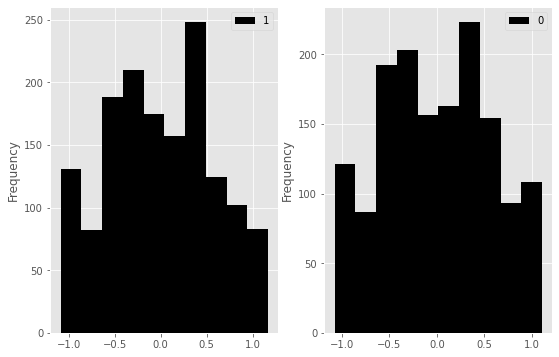

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(9,6))
data.plot(
    kind='hist',
    x='0',
    color='k',
    ax=ax[0],
)
data.plot(
    kind='hist',
    x='1',
    color='k',
    ax=ax[1],
)

In [5]:
from sklearn.cluster import KMeans

best_k = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(data)
    best_k.append([k, kmeans.inertia_])

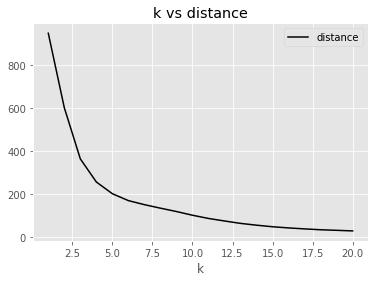

In [6]:
best_k = pd.DataFrame(best_k, columns=['k', 'distance'])

best_k.plot(
    x='k',
    y='distance',
    color='k',
    title='k vs distance',
)

In [7]:
kmeans = KMeans(n_clusters=5, random_state=7)
y_pred_kmeans = kmeans.fit_predict(data)

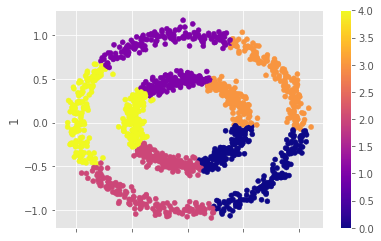

In [8]:
data.plot(
    kind='scatter',
    x='0',
    y='1',
    c=y_pred_kmeans,
    s=25,
    cmap='plasma'
)

In [9]:
from sklearn.cluster import MeanShift

# set bandwith to 0.5
meanshift = MeanShift(bandwidth=.5)
y_pred_shift = meanshift.fit_predict(data)

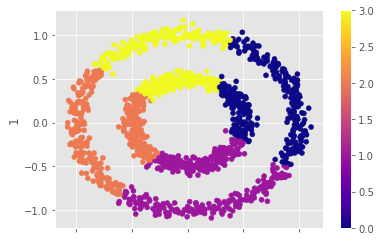

In [10]:
data.plot(
    kind='scatter',
    x='0',
    y='1',
    c=y_pred_shift,
    s=25,
    cmap='plasma'
)

# Exercise2_04


In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.1)
y_pred_dbscan = dbscan.fit_predict(data)

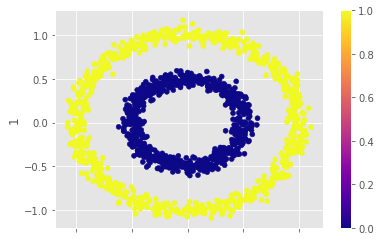

In [12]:
data.plot(
    kind='scatter',
    x='0',
    y='1',
    c=y_pred_dbscan,
    s=25,
    cmap='plasma'
)

# Exercise_2.05


In [16]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
)

kmeans_silhouette_score = silhouette_score(data, y_pred_kmeans, metric='euclidean')
meanshift_silhouette_score = silhouette_score(data, y_pred_shift, metric='euclidean')
dbscan_silhouette_score = silhouette_score(data, y_pred_dbscan, metric='euclidean')

kmeans_calinski_score = calinski_harabasz_score(data, y_pred_kmeans)
meanshift_calinski_score = calinski_harabasz_score(data, y_pred_shift)
dbscan_calinski_score = calinski_harabasz_score(data, y_pred_dbscan)


results = pd.DataFrame({
   'kmeans': [kmeans_silhouette_score, kmeans_calinski_score],
   'meanshift': [meanshift_silhouette_score, meanshift_calinski_score ],
   'dbscan': [dbscan_silhouette_score, dbscan_calinski_score],
   'score_type': ['silhouette', 'calinski_harabasz']
},

)

results = results.set_index(results['score_type'])
results

,kmeans,meanshift,dbscan,score_type
score_type,,,,
silhouette,0.359240,0.370535,0.113941,silhouette
calinski_harabasz,1379.618124,1305.142565,0.001716,calinski_harabasz
